In [1]:
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import kurtosis
import requests
%matplotlib inline

In [2]:
df=pd.read_excel('C:\\Users\\nafissaad\Downloads\\Spreadsheets-20231017T124722Z-001\\Spreadsheets\\NEDL_Hedges_Safe_Havens.xlsx')
df=df[df.columns[:8]]
df.columns=df[:1].values[0][:8]
df.index=df.Date
df=df[1:]
df=df.dropna()
df.drop(columns='Date',inplace=True)
df

,SP500,Gold,Silver,Platinum,Bills,Bonds,Real Estate
Date,,,,,,,
2010-10-14,1173.810059,13.5,24.030001,170.539993,87.461609,77.576225,36.531868
2010-10-15,1176.189941,13.38,23.75,169.039993,87.442543,76.628494,36.484917
2010-10-18,1184.709961,13.44,23.959999,168.929993,87.461609,77.247551,36.954472
2010-10-19,1165.900024,13.04,22.84,165.559998,87.442543,77.713737,36.498318
2010-10-20,1178.170044,13.14,23.33,167.440002,87.442543,77.881905,37.296577
...,...,...,...,...,...,...,...
2020-10-02,3348.419922,18.129999,22.129999,82.599998,91.519997,162.75,81.93
2020-10-05,3408.600098,18.24,22.620001,84.360001,91.519997,159.570007,82.400002
2020-10-06,3360.969971,18,21.73,80.730003,91.529999,160.429993,81.860001


In [3]:
returns=df.pct_change().dropna()
returns

,SP500,Gold,Silver,Platinum,Bills,Bonds,Real Estate
Date,,,,,,,
2010-10-15,0.002027,-0.008889,-0.011652,-0.008796,-0.000218,-0.012217,-0.001285
2010-10-18,0.007244,0.004484,0.008842,-0.000651,0.000218,0.008079,0.012870
2010-10-19,-0.015877,-0.029762,-0.046745,-0.019949,-0.000218,0.006035,-0.012344
2010-10-20,0.010524,0.007669,0.021454,0.011355,0.000000,0.002164,0.021871
2010-10-21,0.001774,-0.012938,-0.031719,-0.002508,0.000000,-0.011874,-0.001079
...,...,...,...,...,...,...,...
2020-10-02,-0.009578,-0.000551,0.001811,-0.025254,0.000000,-0.003734,0.017258
2020-10-05,0.017973,0.006067,0.022142,0.021308,0.000000,-0.019539,0.005737
2020-10-06,-0.013974,-0.013158,-0.039346,-0.043030,0.000109,0.005389,-0.006553


In [4]:
ranked=returns[['SP500','Gold','Silver','Platinum','Bills','Bonds','Real Estate']].sort_values(ascending=True,by='SP500')
ranked

,SP500,Gold,Silver,Platinum,Bills,Bonds,Real Estate
Date,,,,,,,
2020-03-16,-0.119841,-0.010309,-0.123448,-0.134328,0.000109,0.064765,-0.177277
2020-03-12,-0.095113,-0.040333,-0.064619,-0.117791,0.000109,0.006197,-0.101303
2020-03-09,-0.075970,0.002500,-0.018541,-0.042723,0.000437,0.027103,-0.077093
2011-08-08,-0.066634,0.032059,0.017417,0.002940,0.000000,0.031568,-0.086867
2020-06-11,-0.058944,-0.007225,-0.030660,-0.042798,-0.000219,0.018901,-0.064198
...,...,...,...,...,...,...,...
2020-03-17,0.059955,0.013889,-0.010000,0.006929,0.000000,-0.066683,0.057807
2020-03-26,0.062414,0.014332,0.001480,-0.009314,0.000000,0.004922,0.070522
2020-04-06,0.070331,0.026401,0.042348,0.024555,0.000109,-0.002611,0.074074


In [5]:
ranked['Percentile']=[i/len(ranked) for i in range(1,len(ranked)+1)]
ranked

,SP500,Gold,Silver,Platinum,Bills,Bonds,Real Estate,Percentile
Date,,,,,,,,
2020-03-16,-0.119841,-0.010309,-0.123448,-0.134328,0.000109,0.064765,-0.177277,0.000398
2020-03-12,-0.095113,-0.040333,-0.064619,-0.117791,0.000109,0.006197,-0.101303,0.000796
2020-03-09,-0.075970,0.002500,-0.018541,-0.042723,0.000437,0.027103,-0.077093,0.001194
2011-08-08,-0.066634,0.032059,0.017417,0.002940,0.000000,0.031568,-0.086867,0.001592
2020-06-11,-0.058944,-0.007225,-0.030660,-0.042798,-0.000219,0.018901,-0.064198,0.001990
...,...,...,...,...,...,...,...,...
2020-03-17,0.059955,0.013889,-0.010000,0.006929,0.000000,-0.066683,0.057807,0.998408
2020-03-26,0.062414,0.014332,0.001480,-0.009314,0.000000,0.004922,0.070522,0.998806
2020-04-06,0.070331,0.026401,0.042348,0.024555,0.000109,-0.002611,0.074074,0.999204


In [6]:
ranked[(ranked.Percentile>0.0) & (ranked.Percentile<0.01)][['SP500','Gold']].corr().values[0][1]

0.2939678246771849

In [7]:
returns[returns.columns[:-1]].corr()

,SP500,Gold,Silver,Platinum,Bills,Bonds
SP500,1.000000,0.008750,0.188929,0.314362,-0.022010,-0.466206
Gold,0.008750,1.000000,0.791968,0.640759,-0.015818,0.222265
Silver,0.188929,0.791968,1.000000,0.675459,-0.028964,0.043411
Platinum,0.314362,0.640759,0.675459,1.000000,-0.009042,-0.025709
Bills,-0.022010,-0.015818,-0.028964,-0.009042,1.000000,0.034734
Bonds,-0.466206,0.222265,0.043411,-0.025709,0.034734,1.000000


In [8]:
Conditional_Corr=pd.DataFrame(columns=[returns.columns],index=[[i/100 for i in [0,1,5,10,20,30,40,50,60,70,80,90,95,99]],[i/100 for i in [1,5,10,20,30,40,50,60,70,80,90,95,99,100]]])
Conditional_Corr

,,SP500,Gold,Silver,Platinum,Bills,Bonds,Real Estate
0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.01,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.05,0.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.10,0.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.20,0.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.30,0.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.40,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.50,0.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.60,0.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.70,0.80,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
for m in Conditional_Corr.index:
    for j in ranked.columns[:-1]:
        Conditional_Corr.loc[m,j]=ranked[(ranked.Percentile>m[0]) & (ranked.Percentile<m[1])][['SP500',j]].corr().values[0][1]
        print(Conditional_Corr.loc[m,j])
        

SP500    1.0
Name: (0.0, 0.01), dtype: object
Gold    0.293968
Name: (0.0, 0.01), dtype: object
Silver    0.528616
Name: (0.0, 0.01), dtype: object
Platinum    0.778352
Name: (0.0, 0.01), dtype: object
Bills   -0.298699
Name: (0.0, 0.01), dtype: object
Bonds   -0.22522
Name: (0.0, 0.01), dtype: object
Real Estate    0.913706
Name: (0.0, 0.01), dtype: object
SP500    1.0
Name: (0.01, 0.05), dtype: object
Gold   -0.072213
Name: (0.01, 0.05), dtype: object
Silver    0.026335
Name: (0.01, 0.05), dtype: object
Platinum    0.089701
Name: (0.01, 0.05), dtype: object
Bills    0.030115
Name: (0.01, 0.05), dtype: object
Bonds   -0.140512
Name: (0.01, 0.05), dtype: object
Real Estate    0.333015
Name: (0.01, 0.05), dtype: object
SP500    1.0
Name: (0.05, 0.1), dtype: object
Gold   -0.073725
Name: (0.05, 0.1), dtype: object
Silver   -0.186868
Name: (0.05, 0.1), dtype: object
Platinum   -0.052451
Name: (0.05, 0.1), dtype: object
Bills    0.055767
Name: (0.05, 0.1), dtype: object
Bonds    0.07563
Na

In [10]:
Conditional_Corr

,,SP500,Gold,Silver,Platinum,Bills,Bonds,Real Estate
0.00,0.01,1.0,0.293968,0.528616,0.778352,-0.298699,-0.22522,0.913706
0.01,0.05,1.0,-0.072213,0.026335,0.089701,0.030115,-0.140512,0.333015
0.05,0.10,1.0,-0.073725,-0.186868,-0.052451,0.055767,0.07563,0.156885
0.10,0.20,1.0,-0.016133,0.054708,0.087114,0.028337,-0.151524,0.129243
0.20,0.30,1.0,0.005771,-0.041383,-0.045917,0.043032,0.052858,0.139945
0.30,0.40,1.0,-0.015121,0.034765,0.064104,-0.052523,-0.026527,-0.000951
0.40,0.50,1.0,-0.065539,-0.035413,0.03302,-0.069189,-0.019832,0.009289
0.50,0.60,1.0,0.02545,-0.029788,0.102853,0.0192,-0.067045,0.090326
0.60,0.70,1.0,0.047343,0.072128,0.028449,-0.052753,-0.153944,0.000157
0.70,0.80,1.0,-0.053583,-0.048618,0.106887,-0.045861,-0.005862,0.130383


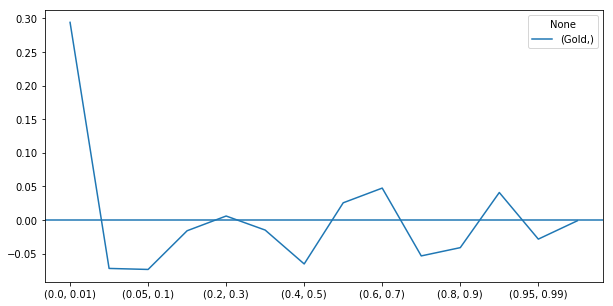

In [11]:
Conditional_Corr['Gold'].plot(figsize=(10,5))
plt.axhline(0)